For 2 MIST files

In [1]:
# usual imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# import additional for n-grams
import re
import string
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import files

In [69]:
# load AS MIST files into colab
from google.colab import files
uploaded = files.upload()

Saving 31febdb6298dde9b6d70098dc378a0230f66af75a550c3970d687622aebb957b.mist to 31febdb6298dde9b6d70098dc378a0230f66af75a550c3970d687622aebb957b.mist
Saving 2cadb75fef08af99c36ab1a2bca1529253b23107f14b1224d218159f7a489b2b.mist to 2cadb75fef08af99c36ab1a2bca1529253b23107f14b1224d218159f7a489b2b.mist


In [70]:
# load filenames from dictionary
file_names = list(uploaded.keys())

In [71]:
# preprocess and tokenise the text
def preprocess_text(text):
    text = text.lower()  # convert all to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # remove any punctuation
    tokens = text.split()  # then tokenise
    return tokens

In [72]:
# generate the n-grams using imported text (n= #words in the ngram)
def generate_ngrams(tokens, n=3):
    return [" ".join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

In [73]:
# work out jacquard similarity between the n-grams
def jaccard_similarity(ngrams1, ngrams2):
    set1, set2 = set(ngrams1), set(ngrams2)
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

# work out cosine similarity between the n-grams
def cosine_similarity_ngrams(ngrams1, ngrams2):
    vectorizer = CountVectorizer().fit(ngrams1 + ngrams2)
    vec1 = vectorizer.transform([" ".join(ngrams1)])
    vec2 = vectorizer.transform([" ".join(ngrams2)])
    return cosine_similarity(vec1, vec2)[0][0]

In [74]:
# compare MIST files using ngrams and the similarity metrics
def compare_texts(file1, file2, n=2):
    with open(file1, "r", encoding="utf-8") as f1, open(file2, "r", encoding="utf-8") as f2:
        text1, text2 = f1.read(), f2.read()

    tokens1, tokens2 = preprocess_text(text1), preprocess_text(text2)
    ngrams1, ngrams2 = generate_ngrams(tokens1, n), generate_ngrams(tokens2, n)

    jaccard = jaccard_similarity(ngrams1, ngrams2)
    cosine = cosine_similarity_ngrams(ngrams1, ngrams2)

    print(f"Jaccard Similarity ({n}-grams): {jaccard:.4f}")
    print(f"Cosine Similarity ({n}-grams): {cosine:.4f}")

In [75]:
# compare MIST files (n= #words in the n-gram)
if len(file_names) >= 2:
    compare_texts(file_names[0], file_names[1], n=3)
else:
    print("upload 2 or more MIST files")

Jaccard Similarity (3-grams): 0.0450
Cosine Similarity (3-grams): 0.8055


In [77]:
# function for wanting to find the most common n-gram in each file
def most_common_ngram(file, n=2):
    with open(file, "r", encoding="utf-8") as f:
        text = f.read()

    #preprocess and generate ngrams
    tokens = preprocess_text(text)
    ngrams = generate_ngrams(tokens, n)

    #count ngrams and find the most commonly occurring
    ngram_counts = Counter(ngrams)
    most_common = ngram_counts.most_common(1)

    #print details of most commonly occurring
    if most_common:
        print(f"most commonly occuring {n}-gram: '{most_common[0][0]}' (occurs {most_common[0][1]} times)")
    else:
        print(f"there were no {n}-grams found in this MIST file")

# Run the function on uploaded files (n=# words in ngram)
for file in file_names:
    print(f"\nAnalyzing file: {file}")
    most_common_ngram(file, n=3)



Analyzing file: 31febdb6298dde9b6d70098dc378a0230f66af75a550c3970d687622aebb957b.mist
most commonly occuring 3-gram: '04 09 b4' (occurs 559 times)

Analyzing file: 2cadb75fef08af99c36ab1a2bca1529253b23107f14b1224d218159f7a489b2b.mist
most commonly occuring 3-gram: '04 09 b4' (occurs 2043 times)


VERSION FOR >2 MIST FILES

In [24]:
# import additional for n-grams and plots
import re
import string
from collections import Counter
from itertools import combinations
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import files
from matplotlib import pyplot as plt

In [25]:
# load AS MIST files into colab
from google.colab import files
uploaded = files.upload()

Saving 5991d27e9deb50537ba83b5d64ead6323253d762abb7ff1c21c54d6366f0c8ac.mist to 5991d27e9deb50537ba83b5d64ead6323253d762abb7ff1c21c54d6366f0c8ac.mist
Saving 59565856d1f4fb85997e59a31bb4adeb5f2b76b490555712dc9395d1ad158997.mist to 59565856d1f4fb85997e59a31bb4adeb5f2b76b490555712dc9395d1ad158997.mist
Saving 593cdb3ba3206c38c5e4509137299d8a281601c6f1e7d26da51c605b1e2aed9c.mist to 593cdb3ba3206c38c5e4509137299d8a281601c6f1e7d26da51c605b1e2aed9c.mist
Saving 59171caa6a021d19cdf1b39ea7cdf346cb399c1dd28ba7a4fbdf78296ca8f1b7.mist to 59171caa6a021d19cdf1b39ea7cdf346cb399c1dd28ba7a4fbdf78296ca8f1b7.mist
Saving 58d8e65976b53b77645c248bfa18c3b87a6ecfb02f306fe6ba4944db96a5ede2.mist to 58d8e65976b53b77645c248bfa18c3b87a6ecfb02f306fe6ba4944db96a5ede2.mist
Saving 587b6377a3e069c1f399cb480729bbc70665cdd25af95f859f4b0a767463b3d3.mist to 587b6377a3e069c1f399cb480729bbc70665cdd25af95f859f4b0a767463b3d3.mist


In [26]:
# load filenames from dictionary
file_names = list(uploaded.keys())

In [27]:
# preprocess and tokenise the text
def preprocess_text(text):
    text = text.lower()  # convert it to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # remove any punctuation
    tokens = text.split()  # then tokenise
    return tokens


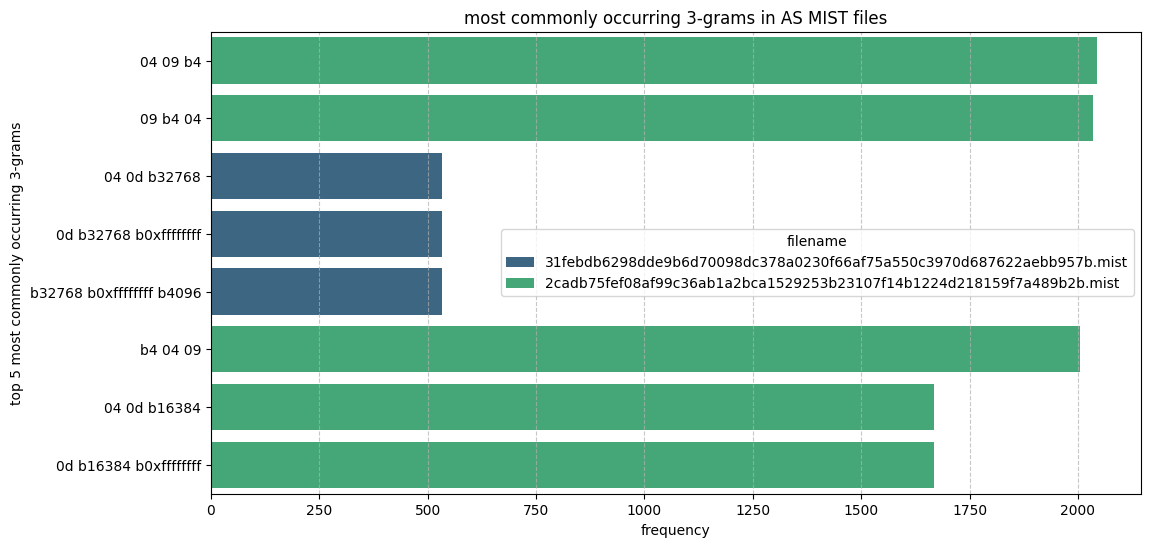

In [79]:
# function for wanting to find the most commonly occurring ngrams across the dataset
def top_n_common_ngrams(file, n=2, top_n=5):
    with open(file, "r", encoding="utf-8") as f:
        text = f.read()

    #preprocess and generate ngrams
    tokens = preprocess_text(text)
    ngrams = generate_ngrams(tokens, n)

    #count ngrams and find the top most commonly occurring ones
    ngram_counts = Counter(ngrams)
    return ngram_counts.most_common(top_n)

# set ngram # words and how many to display
n = 3
top_n = 5

# collect to display
all_ngrams = []
for file in file_names:
    common_ngrams = top_n_common_ngrams(file, n=n, top_n=top_n)
    for ngram, count in common_ngrams:
        all_ngrams.append([file, ngram, count])

# convert to pandas dataframe
df = pd.DataFrame(all_ngrams, columns=["filename", "ngram", "frequency"])

#graph them
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="frequency", y="ngram", hue="filename", dodge=False, palette="viridis")

plt.xlabel("frequency")
plt.ylabel(f"top {top_n} most commonly occurring {n}-grams")
plt.title(f"most commonly occurring {n}-grams in AS MIST files")
plt.legend(title="filename")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


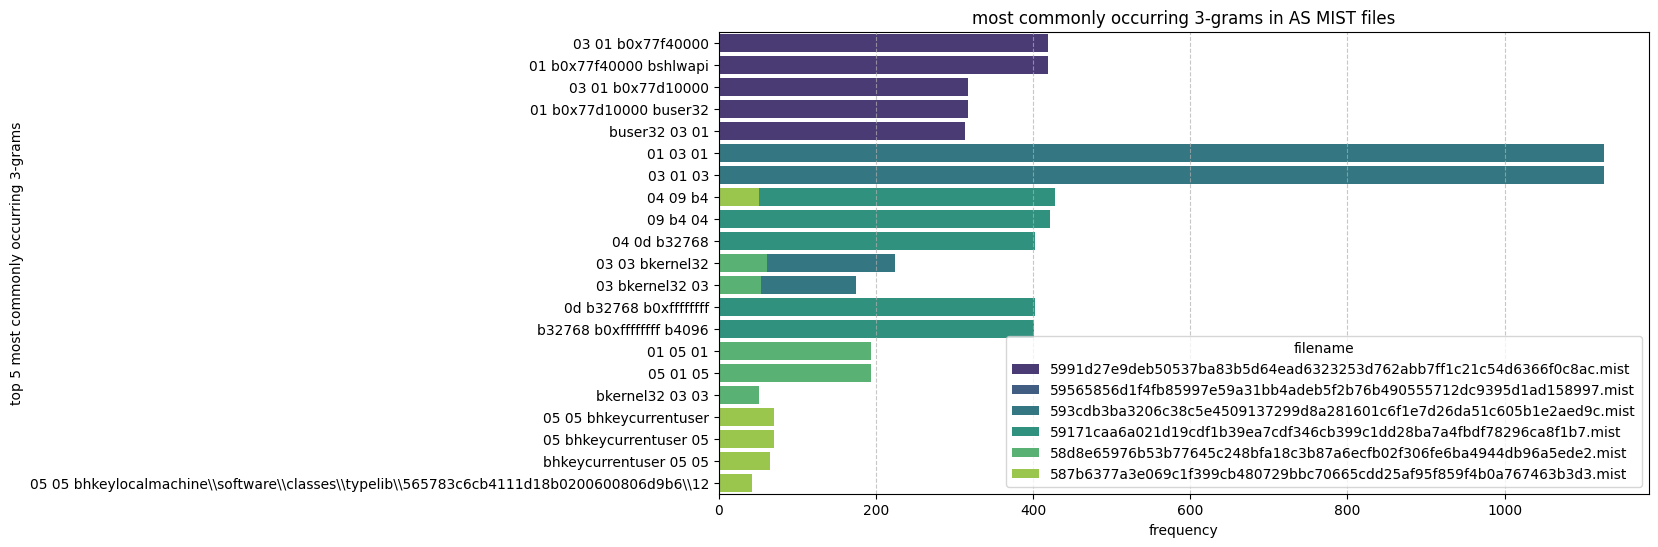

In [68]:
# function for wanting to find the most common ngram in each file
def most_common_ngram(file, n=2):
    with open(file, "r", encoding="utf-8") as f:
        text = f.read()

    #preprocess and generate ngrams
    tokens = preprocess_text(text)
    ngrams = generate_ngrams(tokens, n)

    #count ngrams and find the most commonly occurring
    ngram_counts = Counter(ngrams)
    most_common = ngram_counts.most_common(1)

    #print details of most commonly occurring
    if most_common:
        print(f"most commonly occuring {n}-gram: '{most_common[0][0]}' (occurs {most_common[0][1]} times)")
    else:
        print(f"there were no {n}-grams found in this MIST file")

# function for wanting to find the most commonly occurring ngrams across the dataset
def top_n_common_ngrams(file, n=2, top_n=5):
    with open(file, "r", encoding="utf-8") as f:
        text = f.read()

    #preprocess and generate ngrams
    tokens = preprocess_text(text)
    ngrams = generate_ngrams(tokens, n)

    #count ngrams and find the top most commonly occurring ones
    ngram_counts = Counter(ngrams)
    return ngram_counts.most_common(top_n)

# set ngram # words and how many to display
n = 3
top_n = 5

# collect to display
all_ngrams = []
for file in file_names:
    common_ngrams = top_n_common_ngrams(file, n=n, top_n=top_n)
    for ngram, count in common_ngrams:
        all_ngrams.append([file, ngram, count])

# convert to pandas dataframe
df = pd.DataFrame(all_ngrams, columns=["filename", "ngram", "frequency"])

#graph them
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="frequency", y="ngram", hue="filename", dodge=False, palette="viridis")

plt.xlabel("frequency")
plt.ylabel(f"top {top_n} most commonly occurring {n}-grams")
plt.title(f"most commonly occurring {n}-grams in AS MIST files")
plt.legend(title="filename")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [63]:
def generate_ngrams(tokens, n=2):
    return [" ".join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

In [64]:
# work out jacquard similarity between the n-grams
def jaccard_similarity(ngrams1, ngrams2):
    set1, set2 = set(ngrams1), set(ngrams2)
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

# work out cosine similarity for multiple files
def cosine_similarity_ngrams(ngrams_list):
    vectorizer = CountVectorizer().fit([" ".join(ngrams) for ngrams in ngrams_list])
    vectors = vectorizer.transform([" ".join(ngrams) for ngrams in ngrams_list])
    return cosine_similarity(vectors)

In [65]:
# process the MIST files (n= #words in the n-grams)
text_data = {}
ngrams_data = {}
n = 3

for file in file_names:
    with open(file, "r", encoding="utf-8") as f:
        text = f.read()
    tokens = preprocess_text(text)
    ngrams = generate_ngrams(tokens, n)
    text_data[file] = text
    ngrams_data[file] = ngrams


# work out jaccard similarity for each pair of files
jaccard_results = {}

for file1, file2 in combinations(file_names, 2):
    jaccard_results[(file1, file2)] = jaccard_similarity(ngrams_data[file1], ngrams_data[file2])

# cosine similiarity
cosine_matrix = cosine_similarity_ngrams(list(ngrams_data.values()))


#similarity results into dataframe
jaccard_df = pd.DataFrame.from_dict(jaccard_results, orient="index", columns=["jaccard similarity"])
cosine_df = pd.DataFrame(cosine_matrix, index=file_names, columns=file_names)


# print similarity matrices
print("\njaccard similarity between MIST file pairs:")
display(jaccard_df)

print("\ncosine similarity matrix:")
display(cosine_df)


jaccard similarity between MIST file pairs:


,jaccard similarity
"(5991d27e9deb50537ba83b5d64ead6323253d762abb7ff1c21c54d6366f0c8ac.mist, 59565856d1f4fb85997e59a31bb4adeb5f2b76b490555712dc9395d1ad158997.mist)",0.037908
"(5991d27e9deb50537ba83b5d64ead6323253d762abb7ff1c21c54d6366f0c8ac.mist, 593cdb3ba3206c38c5e4509137299d8a281601c6f1e7d26da51c605b1e2aed9c.mist)",0.112000
"(5991d27e9deb50537ba83b5d64ead6323253d762abb7ff1c21c54d6366f0c8ac.mist, 59171caa6a021d19cdf1b39ea7cdf346cb399c1dd28ba7a4fbdf78296ca8f1b7.mist)",0.038074
"(5991d27e9deb50537ba83b5d64ead6323253d762abb7ff1c21c54d6366f0c8ac.mist, 58d8e65976b53b77645c248bfa18c3b87a6ecfb02f306fe6ba4944db96a5ede2.mist)",0.022909
"(5991d27e9deb50537ba83b5d64ead6323253d762abb7ff1c21c54d6366f0c8ac.mist, 587b6377a3e069c1f399cb480729bbc70665cdd25af95f859f4b0a767463b3d3.mist)",0.014111
"(59565856d1f4fb85997e59a31bb4adeb5f2b76b490555712dc9395d1ad158997.mist, 593cdb3ba3206c38c5e4509137299d8a281601c6f1e7d26da51c605b1e2aed9c.mist)",0.070458
"(59565856d1f4fb85997e59a31bb4adeb5f2b76b490555712dc9395d1ad158997.mist, 59171caa6a021d19cdf1b39ea7cdf346cb399c1dd28ba7a4fbdf78296ca8f1b7.mist)",0.886957
"(59565856d1f4fb85997e59a31bb4adeb5f2b76b490555712dc9395d1ad158997.mist, 58d8e65976b53b77645c248bfa18c3b87a6ecfb02f306fe6ba4944db96a5ede2.mist)",0.035301
"(59565856d1f4fb85997e59a31bb4adeb5f2b76b490555712dc9395d1ad158997.mist, 587b6377a3e069c1f399cb480729bbc70665cdd25af95f859f4b0a767463b3d3.mist)",0.033603
"(593cdb3ba3206c38c5e4509137299d8a281601c6f1e7d26da51c605b1e2aed9c.mist, 59171caa6a021d19cdf1b39ea7cdf346cb399c1dd28ba7a4fbdf78296ca8f1b7.mist)",0.070814



cosine similarity matrix:


,5991d27e9deb50537ba83b5d64ead6323253d762abb7ff1c21c54d6366f0c8ac.mist,59565856d1f4fb85997e59a31bb4adeb5f2b76b490555712dc9395d1ad158997.mist,593cdb3ba3206c38c5e4509137299d8a281601c6f1e7d26da51c605b1e2aed9c.mist,59171caa6a021d19cdf1b39ea7cdf346cb399c1dd28ba7a4fbdf78296ca8f1b7.mist,58d8e65976b53b77645c248bfa18c3b87a6ecfb02f306fe6ba4944db96a5ede2.mist,587b6377a3e069c1f399cb480729bbc70665cdd25af95f859f4b0a767463b3d3.mist
5991d27e9deb50537ba83b5d64ead6323253d762abb7ff1c21c54d6366f0c8ac.mist,1.000000,0.559025,0.858811,0.448573,0.425330,0.273566
59565856d1f4fb85997e59a31bb4adeb5f2b76b490555712dc9395d1ad158997.mist,0.559025,1.000000,0.654807,0.901556,0.690805,0.747094
593cdb3ba3206c38c5e4509137299d8a281601c6f1e7d26da51c605b1e2aed9c.mist,0.858811,0.654807,1.000000,0.541167,0.520634,0.354499
59171caa6a021d19cdf1b39ea7cdf346cb399c1dd28ba7a4fbdf78296ca8f1b7.mist,0.448573,0.901556,0.541167,1.000000,0.539317,0.508976
58d8e65976b53b77645c248bfa18c3b87a6ecfb02f306fe6ba4944db96a5ede2.mist,0.425330,0.690805,0.520634,0.539317,1.000000,0.721873
587b6377a3e069c1f399cb480729bbc70665cdd25af95f859f4b0a767463b3d3.mist,0.273566,0.747094,0.354499,0.508976,0.721873,1.000000


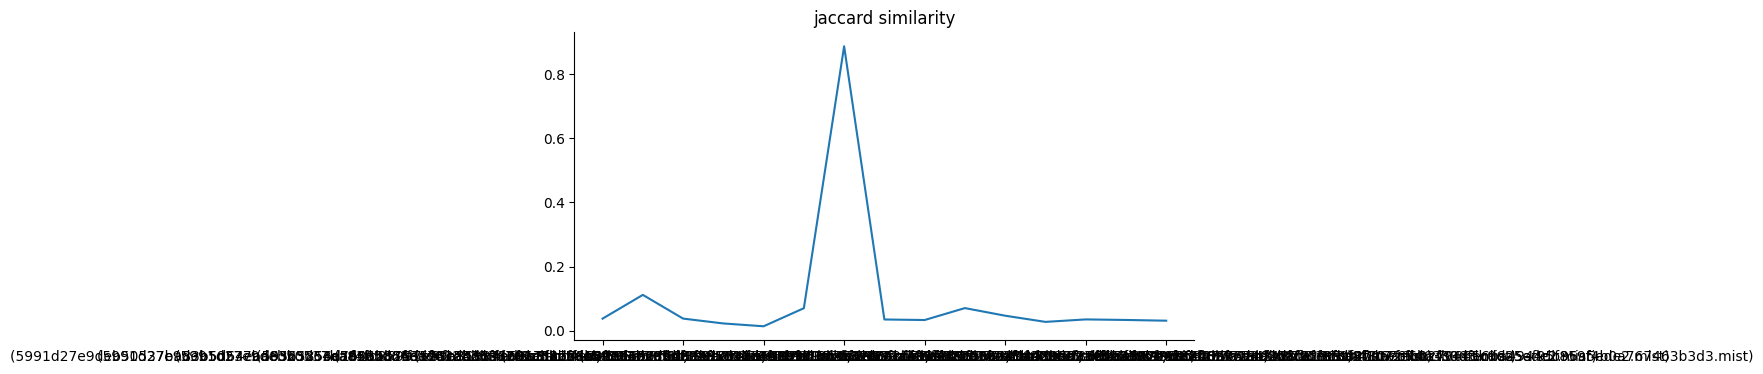

In [66]:
# @title jaccard similarity
jaccard_df['jaccard similarity'].plot(kind='line', figsize=(8, 4), title='jaccard similarity')
plt.gca().spines[['top', 'right']].set_visible(False)

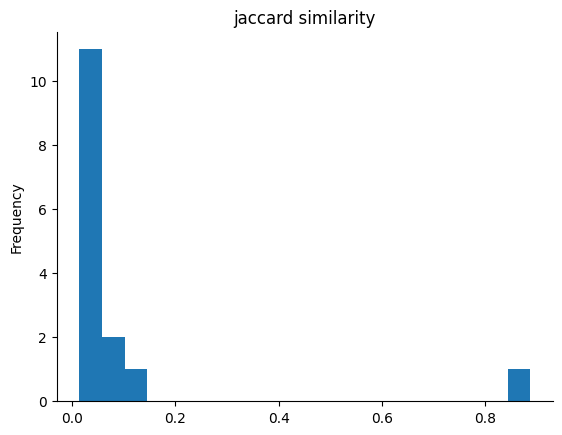

In [67]:
# @title Jaccard Similarity
jaccard_df['jaccard similarity'].plot(kind='hist', bins=20, title='jaccard similarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [56]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=cosine_df)

https://docs.google.com/spreadsheets/d/1M913NNumpbFWOiJQzI8LDqHHLil9WMKVvXKU716inOw#gid=0


In [57]:
from google.colab import sheets
sheet2 = sheets.InteractiveSheet(df=jaccard_df)

https://docs.google.com/spreadsheets/d/1KBs5QrtZy8VY04VJ3r9E28DFC80ZPlELOQNwqbhKYGY#gid=0
